In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
del data['CustomerID']
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
columns = {'Annual Income (k$)':'annual_income', 
            'Age': 'age',
            'Spending Score (1-100)': 'spending_score',
            'Gender': 'gender'}

data.rename(columns = columns, inplace = True)


data.loc[data['gender'] == "Male", 'gender'] = 0
data.loc[data['gender'] == "Female", 'gender'] = 1
data['gender'] = data['gender'].astype(int)


data

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


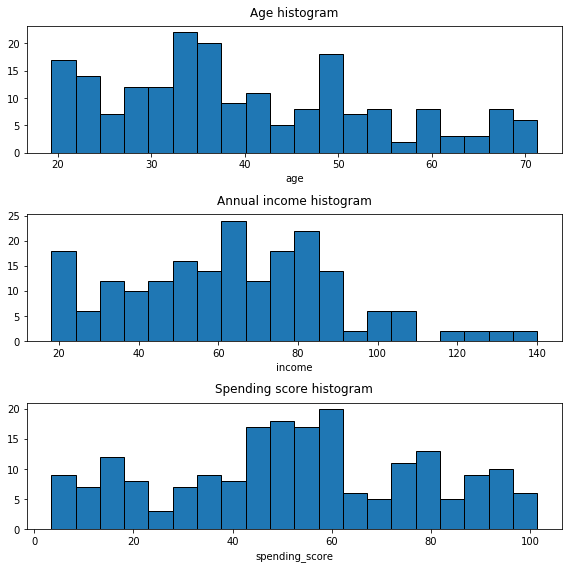

In [4]:
plt.figure(figsize=(8,8))
plt.subplot(311)
plt.hist(data['age'], align='right', color='tab:blue', edgecolor='black', bins=20)
plt.title("Age histogram", pad=10)
plt.xlabel("age")
plt.subplot(312)
plt.hist(data['annual_income'], align='right', color='tab:blue', edgecolor='black', bins=20)
plt.title("Annual income histogram", pad=10)
plt.xlabel("income")
plt.subplot(313)
plt.hist(data['spending_score'], align='right', color='tab:blue', edgecolor='black', bins=20)
plt.title("Spending score histogram", pad=10)
plt.xlabel("spending_score")
plt.tight_layout()
plt.show()

In [5]:
def addlabels2(x,y,w=0):
    for i in range(len(x)):
        y[i] = float(format(y[i], ".5f"))
        plt.text(i+w, y[i]- 5, y[i], ha = 'center', size=15)

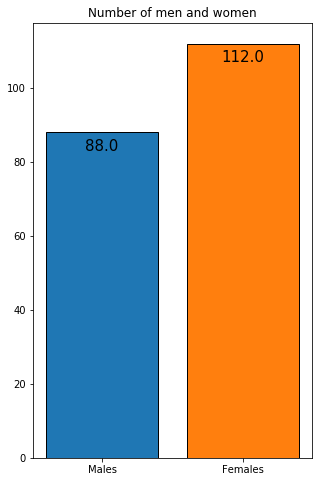

In [6]:
males = data[data['gender'] == 0]
females = data[data['gender'] == 1]

labels = ["Males", "Females"]
values = [len(males), len(females)]
plt.figure(figsize=(5,8))
plt.bar(labels, values, align='center', color=['tab:blue', 'tab:orange'], edgecolor='black')
addlabels2(labels, values)
plt.title("Number of men and women")
plt.show()

In [7]:
def plotTwoColumns(col1, col2):
    plt.scatter(col1, col2,s=20)
    plt.xlabel(str(col1.name))
    plt.ylabel(str(col2.name))

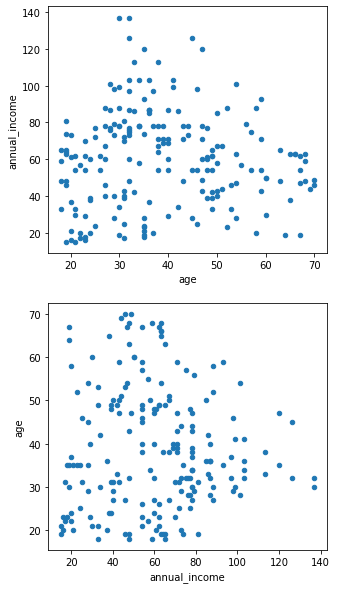

In [8]:
ages = data['age']
annual_income = data['annual_income']
spending_score = data['spending_score']

plt.figure(figsize=(5,10))
plt.subplot(211)
plotTwoColumns(ages, annual_income)
plt.subplot(212)
plotTwoColumns(annual_income, ages)
plt.show()

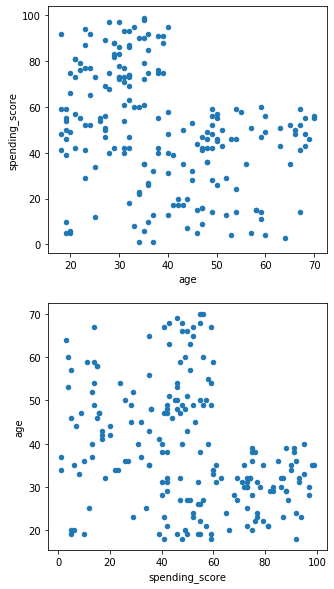

In [9]:
plt.figure(figsize=(5,10))
plt.subplot(211)
plotTwoColumns(ages, spending_score)
plt.subplot(212)
plotTwoColumns(spending_score, ages)
plt.show()

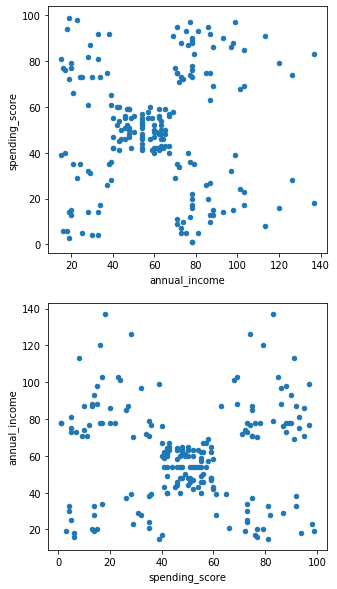

In [10]:
plt.figure(figsize=(5,10))
plt.subplot(211)
plotTwoColumns(annual_income, spending_score)
plt.subplot(212)
plotTwoColumns(spending_score, annual_income)
plt.show()

In [11]:
data.cov()

,gender,age,annual_income,spending_score
gender,0.247638,-0.423116,-0.737286,0.746734
age,-0.423116,195.133166,-4.548744,-118.040201
annual_income,-0.737286,-4.548744,689.835578,6.716583
spending_score,0.746734,-118.040201,6.716583,666.854271


In [12]:
data.corr()

,gender,age,annual_income,spending_score
gender,1.000000,-0.060867,-0.056410,0.058109
age,-0.060867,1.000000,-0.012398,-0.327227
annual_income,-0.056410,-0.012398,1.000000,0.009903
spending_score,0.058109,-0.327227,0.009903,1.000000


In [13]:
ex_variance=np.var(data,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

gender            0.000160
age               0.125724
annual_income     0.444461
spending_score    0.429655
dtype: float64


In [14]:
dataC = pd.DataFrame(data, columns = ['age', 'spending_score'])
dataC

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


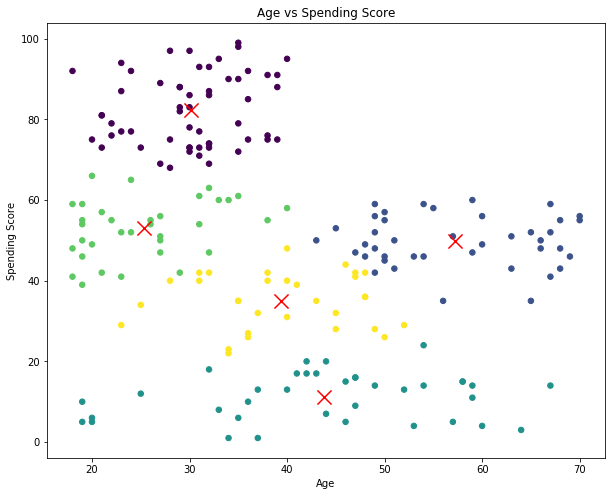

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(dataC)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10,8))
plt.scatter(data['age'], data['spending_score'],c=labels,s=30)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',c='red',s=200,alpha=1)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.grid(False)
plt.show()

In [16]:
# from sklearn.preprocessing import StandardScaler
x = data.values
# x = StandardScaler().fit_transform(x)
# x

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


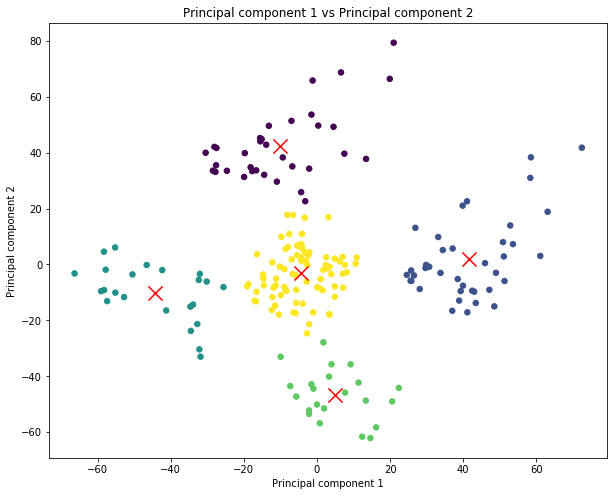

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(principalDf)
labelsPCA = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=labelsPCA,s=30)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',c='red',s=200,alpha=1)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component 1 vs Principal component 2')
plt.grid(False)
plt.show()

In [19]:
np.var(data)

gender              0.2464
age               194.1575
annual_income     686.3864
spending_score    663.5200
dtype: float64

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

In [21]:
print(pca.explained_variance_ratio_.sum())

0.892096162464606


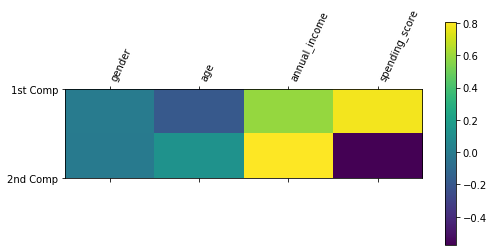

In [22]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(data.columns)),data.columns,rotation=65,ha='left')
plt.show()# 

In [23]:
copied_data = data
copied_data['class'] = labels
copied_data['classPCA'] = labelsPCA
copied_data

,gender,age,annual_income,spending_score,class,classPCA
0,0,19,15,39,3,2
1,0,21,15,81,0,3
2,1,20,16,6,2,2
3,1,23,16,77,0,3
4,1,31,17,40,4,2
...,...,...,...,...,...,...
195,1,35,120,79,0,1
196,1,45,126,28,4,0
197,0,32,126,74,0,1
198,0,32,137,18,2,0


In [24]:
class_0 = copied_data[copied_data['class'] == 0]
class_1 = copied_data[copied_data['class'] == 1]
class_2 = copied_data[copied_data['class'] == 2]
class_3 = copied_data[copied_data['class'] == 3]
class_4 = copied_data[copied_data['class'] == 4]

classPCA_0 = copied_data[copied_data['classPCA'] == 0]
classPCA_1 = copied_data[copied_data['classPCA'] == 1]
classPCA_2 = copied_data[copied_data['classPCA'] == 2]
classPCA_3 = copied_data[copied_data['classPCA'] == 3]
classPCA_4 = copied_data[copied_data['classPCA'] == 4]

In [25]:
def stats(df):
    males = len(df[df['gender'] == 0])
    females = len(df[df['gender'] == 1])
    avg_spending = df['spending_score'].mean()
    avg_income = df['annual_income'].mean()
    avg_age = df['age'].mean()

    return males, females, round(avg_spending,2), round(avg_income,2), round(avg_age,2)

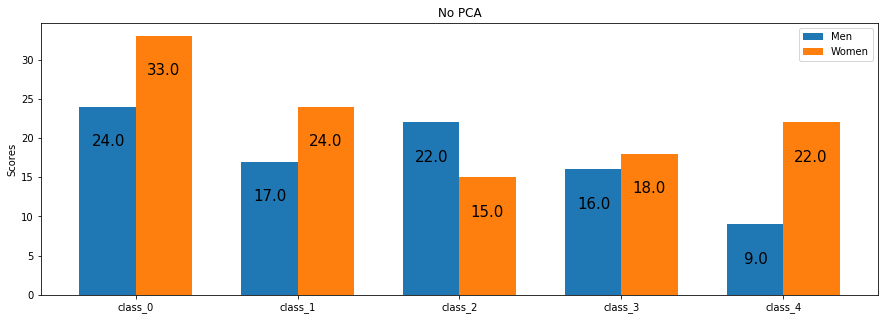

In [26]:
stats_0 = stats(class_0)
stats_1 = stats(class_1)
stats_2 = stats(class_2)
stats_3 = stats(class_3)
stats_4 = stats(class_4)

labels = ["class_0", "class_1", "class_2", "class_3", "class_4"]
men_means = [stats_0[0], stats_1[0], stats_2[0], stats_3[0], stats_4[0]]
women_means = [stats_0[1], stats_1[1], stats_2[1], stats_3[1], stats_4[1]]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
addlabels2(labels, men_means, -0.17)
addlabels2(labels, women_means, +0.17)
fig.set_figwidth(15)
fig.set_figheight(5)
plt.title("No PCA")
plt.show()

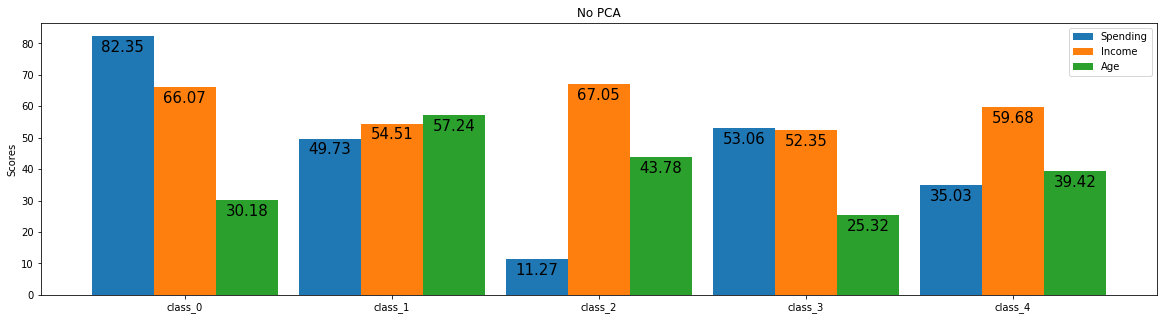

In [27]:
labels = ["class_0", "class_1", "class_2", "class_3", "class_4"]
spending = [stats_0[2], stats_1[2], stats_2[2], stats_3[2], stats_4[2]]
income = [stats_0[3], stats_1[3], stats_2[3], stats_3[3], stats_4[3]]
age = [stats_0[4], stats_1[4], stats_2[4], stats_3[4], stats_4[4]]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/1, spending, width, label='Spending')
rects2 = ax.bar(x, income, width, label='Income')
rects2 = ax.bar(x + width/1, age, width, label='Age')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.set_figwidth(20)
fig.set_figheight(5)
addlabels2(labels, spending, -0.30)
addlabels2(labels, income)
addlabels2(labels, age, +0.30)
plt.title("No PCA")
plt.show()

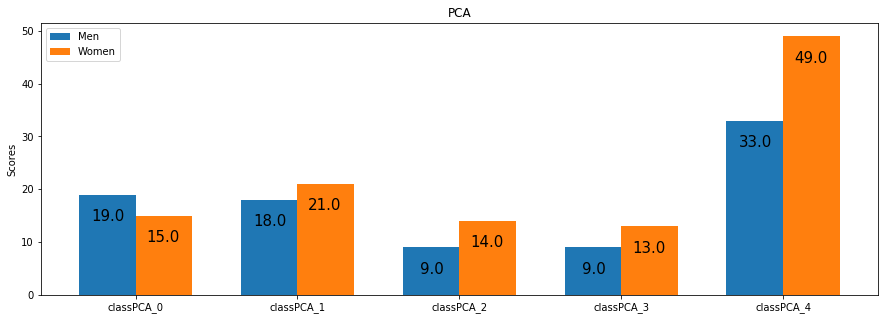

In [28]:
stats_0 = stats(classPCA_0)
stats_1 = stats(classPCA_1)
stats_2 = stats(classPCA_2)
stats_3 = stats(classPCA_3)
stats_4 = stats(classPCA_4)

labels = ["classPCA_0", "classPCA_1", "classPCA_2", "classPCA_3", "classPCA_4"]
men_means = [stats_0[0], stats_1[0], stats_2[0], stats_3[0], stats_4[0]]
women_means = [stats_0[1], stats_1[1], stats_2[1], stats_3[1], stats_4[1]]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
addlabels2(labels, men_means, -0.17)
addlabels2(labels, women_means, +0.17)
fig.set_figwidth(15)
fig.set_figheight(5)
plt.title("PCA")

plt.show()

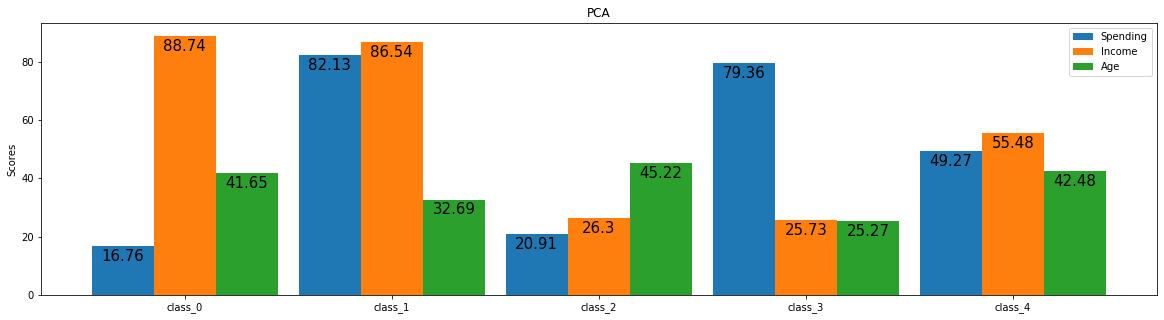

In [29]:
labels = ["class_0", "class_1", "class_2", "class_3", "class_4"]
spending = [stats_0[2], stats_1[2], stats_2[2], stats_3[2], stats_4[2]]
income = [stats_0[3], stats_1[3], stats_2[3], stats_3[3], stats_4[3]]
age = [stats_0[4], stats_1[4], stats_2[4], stats_3[4], stats_4[4]]

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/1, spending, width, label='Spending')
rects2 = ax.bar(x, income, width, label='Income')
rects2 = ax.bar(x + width/1, age, width, label='Age')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.set_figwidth(20)
fig.set_figheight(5)
addlabels2(labels, spending, -0.30)
addlabels2(labels, income)
addlabels2(labels, age, +0.30)
plt.title("PCA")
plt.show()